In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Betartib datasetni tartiblaymiz

In [190]:
df = pd.read_csv('example.csv')
df_old = df
df.head()

,Unnamed: 0,Safety,yacEPA,Drive,FieldGoalDistance,airEPA,Field_Goal_Prob,posteam,Penalty.Yards,FieldGoalResult,...,Accepted.Penalty,qtr,AwayTimeouts_Remaining_Post,RunGap,Reception,TimeUnder,Season,Opp_Safety_Prob,No_Score_Prob,Challenge.Replay
0,244485,0,1.240299,18,NaN,-0.588101,0.309404,TB,0,NaN,...,0,3,3,NaN,1,1,2014,0.000527,0.024134,0
1,115340,0,NaN,22,NaN,NaN,0.198142,OAK,0,NaN,...,0,4,3,NaN,0,7,2011,0.001883,0.246929,0
2,68357,0,NaN,8,NaN,NaN,0.000000,NYJ,0,NaN,...,0,2,1,NaN,0,1,2010,0.000000,0.000000,0
3,368377,0,1.075660,24,NaN,0.402080,0.258227,CLE,0,NaN,...,0,4,0,NaN,1,9,2017,0.000845,0.133814,0
4,384684,0,NaN,11,NaN,NaN,0.199771,DEN,0,NaN,...,0,2,2,end,0,10,2017,0.003453,0.170787,0


### Ustunlani tekshirib ko'raman NaN qiymatlari soni 50% dan ko'p bo'lgan ustunlarni tashlab yuboraman

In [191]:
ls = []
for i in df.columns:
    if 50 < len(df[df[i].isnull()]) * 100 / len(df[i]):
        ls.append(i)
        df = df.drop(columns=i) 
              
# 2- usul
# for i in df.columns:
#     if df[i].isnull().sum() > df.shape[0] * 0.5:
#         del df[i]       

#### NaN qiymatlar ulushi %50dan yuqori bo'lgan ustunlarni datasetdan tushirib tashlash uchun funksiya yozib oldim

### NaN qiymatlari 50%dan baland bo'lgan ustunlarni listga yig'ib olgandim endi shularni chiqarib bular qaysi ustunlar ekanligini ko'ramiz

In [192]:
ls

['yacEPA',
 'FieldGoalDistance',
 'airEPA',
 'FieldGoalResult',
 'Tackler2',
 'Passer',
 'TwoPointConv',
 'PassOutcome',
 'RunGap']

#### Bu ustunlarda NaN qiymatlar ulushi 50% dan baland

In [193]:
df_old.shape

(40769, 32)

In [194]:
df.shape

(40769, 23)

#### Dataframe ustunlari soni ko'rib turganimizdek 32tadan 23taga kamaydi ya'ni 9ta ustun ma'lumotlarida NaN qiymatlar ulushi 50%dan yuqori

In [195]:
df.head()

,Unnamed: 0,Safety,Drive,Field_Goal_Prob,posteam,Penalty.Yards,DefTeamScore,Away_WP_pre,Timeout_Indicator,ydsnet,...,RushAttempt,Accepted.Penalty,qtr,AwayTimeouts_Remaining_Post,Reception,TimeUnder,Season,Opp_Safety_Prob,No_Score_Prob,Challenge.Replay
0,244485,0,18,0.309404,TB,0,10.0,0.774353,0,11,...,0,0,3,3,1,1,2014,0.000527,0.024134,0
1,115340,0,22,0.198142,OAK,0,14.0,0.943964,0,24,...,1,0,4,3,0,7,2011,0.001883,0.246929,0
2,68357,0,8,0.000000,NYJ,0,13.0,0.634693,0,80,...,0,0,2,1,0,1,2010,0.000000,0.000000,0
3,368377,0,24,0.258227,CLE,0,31.0,0.064005,0,25,...,0,0,4,0,1,9,2017,0.000845,0.133814,0
4,384684,0,11,0.199771,DEN,0,24.0,0.071526,0,0,...,1,0,2,2,0,10,2017,0.003453,0.170787,0


#### Bizda 'Unamed: 0' ustuni bor va u IDlarga ko'proq o'xshaydi lekin nomsiz. Bu ustun nomi 'ID'ga almashtiramiz

In [196]:
df = df.rename(columns={'Unnamed: 0': 'ID'})

#### 'Unamed: 0' ustunini 'ID' deb nomlab oldik

#### Endi 'ID' ustuni bo'yicha ma'lumotlarni sortlab olaman

In [197]:
df = df.sort_values(by = 'ID')
df.head(10)

,ID,Safety,Drive,Field_Goal_Prob,posteam,Penalty.Yards,DefTeamScore,Away_WP_pre,Timeout_Indicator,ydsnet,...,RushAttempt,Accepted.Penalty,qtr,AwayTimeouts_Remaining_Post,Reception,TimeUnder,Season,Opp_Safety_Prob,No_Score_Prob,Challenge.Replay
31531,47,0,9,0.185016,PIT,10,0.0,0.501676,0,10,...,0,1,2,3,0,10,2009,0.004040,0.155230,0
17794,64,0,10,0.458862,TEN,0,0.0,0.588271,0,60,...,0,0,2,3,0,3,2009,0.000052,0.182313,0
25490,73,0,11,0.000000,PIT,0,0.0,0.261614,0,79,...,0,0,2,3,0,2,2009,0.000000,0.000000,0
36845,80,0,13,0.104629,PIT,0,7.0,0.480809,0,0,...,0,0,2,2,0,1,2009,0.003152,0.720013,0
32395,89,0,13,0.172726,PIT,0,7.0,0.467304,0,18,...,0,0,2,2,0,1,2009,0.001092,0.656391,0
36302,95,0,14,0.338693,TEN,0,7.0,0.601609,0,37,...,1,0,3,3,0,13,2009,0.000253,0.001068,0
13744,117,0,18,0.220060,TEN,5,7.0,0.490377,0,19,...,0,1,3,3,1,3,2009,0.003452,0.024477,0
11780,119,0,18,0.116627,TEN,0,7.0,0.410779,0,19,...,0,0,3,3,0,2,2009,0.006028,0.032598,0
35619,126,0,20,0.315481,TEN,0,7.0,0.589434,0,14,...,1,0,4,3,0,15,2009,0.000399,0.029356,0
31743,135,0,21,0.263943,PIT,0,10.0,0.548546,0,21,...,0,0,4,3,1,10,2009,0.000866,0.114256,0


#### Natijada biz dataframeni 'ID' ustuni bo'yicha sortlangan dataframge ega bo'lamiz lekin indekslarimiz betartib ahvolga kelib qoldi endi buni to'g'irlaymiz

In [198]:
df.reset_index(drop = True, inplace = True)
df.head(10)

,ID,Safety,Drive,Field_Goal_Prob,posteam,Penalty.Yards,DefTeamScore,Away_WP_pre,Timeout_Indicator,ydsnet,...,RushAttempt,Accepted.Penalty,qtr,AwayTimeouts_Remaining_Post,Reception,TimeUnder,Season,Opp_Safety_Prob,No_Score_Prob,Challenge.Replay
0,47,0,9,0.185016,PIT,10,0.0,0.501676,0,10,...,0,1,2,3,0,10,2009,0.004040,0.155230,0
1,64,0,10,0.458862,TEN,0,0.0,0.588271,0,60,...,0,0,2,3,0,3,2009,0.000052,0.182313,0
2,73,0,11,0.000000,PIT,0,0.0,0.261614,0,79,...,0,0,2,3,0,2,2009,0.000000,0.000000,0
3,80,0,13,0.104629,PIT,0,7.0,0.480809,0,0,...,0,0,2,2,0,1,2009,0.003152,0.720013,0
4,89,0,13,0.172726,PIT,0,7.0,0.467304,0,18,...,0,0,2,2,0,1,2009,0.001092,0.656391,0
5,95,0,14,0.338693,TEN,0,7.0,0.601609,0,37,...,1,0,3,3,0,13,2009,0.000253,0.001068,0
6,117,0,18,0.220060,TEN,5,7.0,0.490377,0,19,...,0,1,3,3,1,3,2009,0.003452,0.024477,0
7,119,0,18,0.116627,TEN,0,7.0,0.410779,0,19,...,0,0,3,3,0,2,2009,0.006028,0.032598,0
8,126,0,20,0.315481,TEN,0,7.0,0.589434,0,14,...,1,0,4,3,0,15,2009,0.000399,0.029356,0
9,135,0,21,0.263943,PIT,0,10.0,0.548546,0,21,...,0,0,4,3,1,10,2009,0.000866,0.114256,0


#### reset_index funksiya yordamida indexlarni tartibli holatga keltirib oldik

### Endi dataframe ustunlarini agar tipi obyekt bo'lsa NaN qiymatlarini shu ustunning modasi bilan agar numeric bo'lsa mediani bilan to'ldirib chiqamiz

In [199]:
for i in df.columns:
    if pd.api.types.is_numeric_dtype(df[i]):
        df[i] = pd.to_numeric(df[i], errors = 'coerce')
        df[i] = df[i].fillna(df[i].median())
    else:
        df[i] = df[i].fillna(df[i].mode()[0])

In [200]:
df

,ID,Safety,Drive,Field_Goal_Prob,posteam,Penalty.Yards,DefTeamScore,Away_WP_pre,Timeout_Indicator,ydsnet,...,RushAttempt,Accepted.Penalty,qtr,AwayTimeouts_Remaining_Post,Reception,TimeUnder,Season,Opp_Safety_Prob,No_Score_Prob,Challenge.Replay
0,47,0,9,0.185016,PIT,10,0.0,0.501676,0,10,...,0,1,2,3,0,10,2009,0.004040,0.155230,0
1,64,0,10,0.458862,TEN,0,0.0,0.588271,0,60,...,0,0,2,3,0,3,2009,0.000052,0.182313,0
2,73,0,11,0.000000,PIT,0,0.0,0.261614,0,79,...,0,0,2,3,0,2,2009,0.000000,0.000000,0
3,80,0,13,0.104629,PIT,0,7.0,0.480809,0,0,...,0,0,2,2,0,1,2009,0.003152,0.720013,0
4,89,0,13,0.172726,PIT,0,7.0,0.467304,0,18,...,0,0,2,2,0,1,2009,0.001092,0.656391,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40764,407628,0,23,0.359564,BAL,5,23.0,0.597442,0,44,...,0,1,3,1,0,1,2017,0.000071,0.013712,0
40765,407639,0,24,0.203227,CIN,0,20.0,0.620527,0,2,...,1,0,4,1,0,14,2017,0.005028,0.078316,0
40766,407643,0,25,0.339111,BAL,0,23.0,0.500512,0,21,...,0,0,4,1,1,12,2017,0.000118,0.041014,0
40767,407655,0,26,0.054959,CIN,10,27.0,0.247716,0,-5,...,0,1,4,1,0,7,2017,0.006276,0.287563,0


In [201]:
df['posteam'].unique()


array(['PIT', 'TEN', 'DEN', 'CLE', 'MIN', 'NO', 'DET', 'DAL', 'TB', 'HOU',
       'NYJ', 'IND', 'JAC', 'CIN', 'CAR', 'PHI', 'KC', 'BAL', 'MIA',
       'ATL', 'SF', 'ARI', 'STL', 'SEA', 'NYG', 'WAS', 'GB', 'CHI', 'BUF',
       'NE', 'OAK', 'SD', 'LA', 'JAX', 'LAC'], dtype=object)

#### Datafameni Nan qiymatlardan tozalab oldik

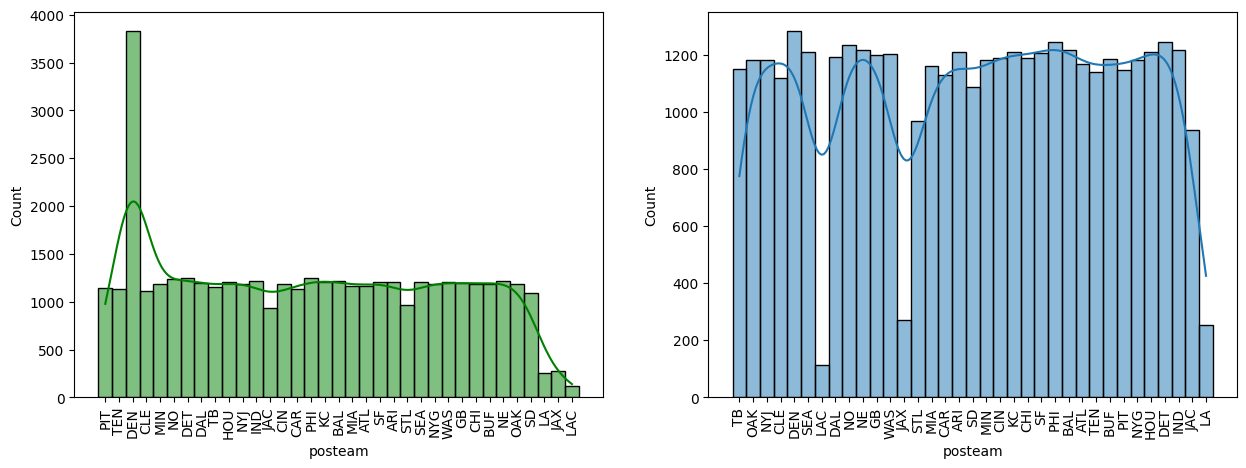

In [202]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = [15, 5])
sns.histplot(data = df, x = 'posteam', ax = ax0, color='g', kde = True)
sns.histplot(data = df_old, x = 'posteam', ax = ax1, kde = True)
ax0.tick_params(axis = 'x', rotation = 90)
ax1.tick_params(axis = 'x', rotation = 90)
plt.show()

In [203]:
print(f"{round(df_old['posteam'].isnull().sum() * 100 / (len(df_old['posteam'])), 2)}% qismi NaN")

6.25% qismi NaN


In [204]:
df['posteam'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 40769 entries, 0 to 40768
Series name: posteam
Non-Null Count  Dtype 
--------------  ----- 
40769 non-null  object
dtypes: object(1)
memory usage: 318.6+ KB


### Grafiklar bergan natijalarga ko'ra NaN qiymatlar 6.25% qismini tashkil qilgan ustun va NaN qiymatlari shu ustunning modasi bilan to'dirilgan ustunda katta farq yuzaga keladi 

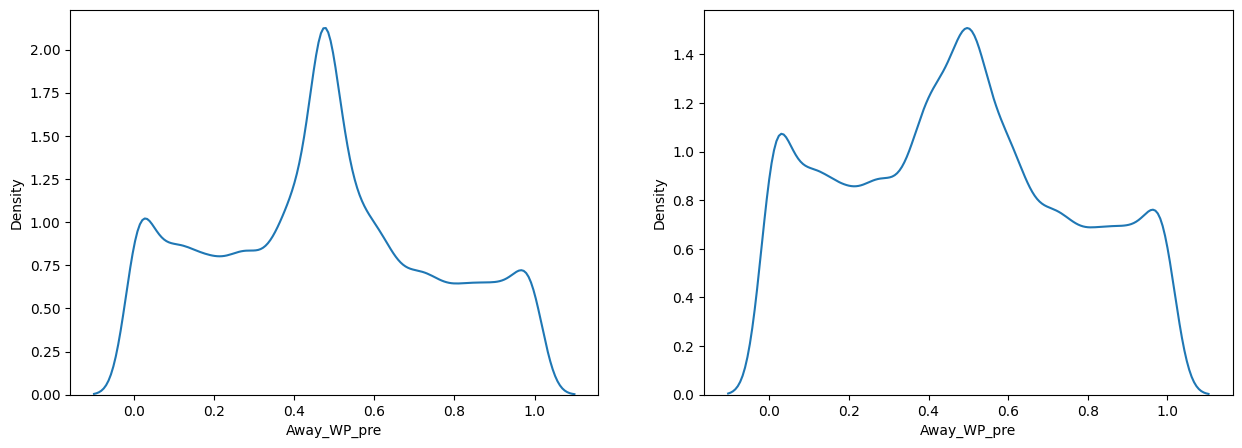

In [205]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize = [15, 5])
sns.kdeplot(df['Away_WP_pre'], ax = ax0)
sns.kdeplot(df_old['Away_WP_pre'], ax = ax1)
plt.show()

In [206]:
print(f"{round(df_old['Away_WP_pre'].isnull().sum() * 100 / (len(df_old['Away_WP_pre'])), 2)}% qismi NaN")

6.24% qismi NaN


#### Bu grafiklardan ham shuni ko'rishimiz mumkinki eski va ishlov berilgan ustunlarda farq bor

In [207]:
import pandas as pd
ls = [
    [1, 12],
    [2, 4],
    [45, 4],
    [4, 67]
]

df = pd.DataFrame(data = ls, columns=['s', 'a'])
df

,s,a
0,1,12
1,2,4
2,45,4
3,4,67


In [213]:
import pandas as pd

data = {
    'id': [1, 2],
    'recordDate': ['2000-12-14', '2000-12-16'],
    'temperature': [3, 5]
}

weather_df = pd.DataFrame(data) 
weather_df['recordDate'] = pd.to_datetime(weather_df['recordDate'])

weather_df.sort_values(by = 'recordDate', ascending = True, inplace = True)
weather_df['prevoious_day_temp'] = weather_df['temperature'].shift(1)
new_df = weather_df[weather_df['prevoious_day_temp'] < weather_df['temperature']][['id']]
new_df.reset_index(drop = True, inplace=True)
print(new_df)

   id
0   2


In [216]:
import pandas as pd

# Example data
data = {
    'id': [1, 2],
    'recordDate': ['2000-12-14', '2000-12-16'],
    'temperature': [3, 5]
}

# Create DataFrame
weather_df = pd.DataFrame(data)
weather_df['recordDate'] = pd.to_datetime(weather_df['recordDate'])

# Sort DataFrame by 'recordDate'
weather_df.sort_values(by='recordDate', ascending=True, inplace=True)

# Calculate previous day's temperature and the difference in days
weather_df['previous_day_temp'] = weather_df['temperature'].shift(1)
weather_df['date_diff'] = weather_df['recordDate'].diff().dt.days

# Filter rows where today's temperature is greater than yesterday's and dates are consecutive
new_df = weather_df[(weather_df['date_diff'] == 1) & (weather_df['temperature'] > weather_df['previous_day_temp'])][['id']]

# Reset index
new_df.reset_index(drop=True, inplace=True)

# Print result
new_df

,id


In [217]:
weather_df

,id,recordDate,temperature,previous_day_temp,date_diff
0,1,2000-12-14,3,NaN,NaN
1,2,2000-12-16,5,3.0,2.0


In [239]:
import pandas as pd
data = {
    'product_id': [1, 1, 2, 2],
    'start_date': ['2019-02-17', '2019-03-01', '2019-02-01', '2019-02-21'],
    'end_date': ['2019-02-28', '2019-03-22', '2019-02-20', '2019-03-31'],
    'price': [5, 20, 15, 30]
}

prices_df = pd.DataFrame(data)

prices_df['start_date'] = pd.to_datetime(prices_df['start_date'])
prices_df['end_date'] = pd.to_datetime(prices_df['end_date'])

data = {
    'product_id': [1, 1, 2, 2],
    'purchase_date': ['2019-02-25', '2019-03-01', '2019-02-10', '2019-03-22'],
    'units': [100, 15, 200, 30]
}

units_sold_df = pd.DataFrame(data)

units_sold_df['purchase_date'] = pd.to_datetime(units_sold_df['purchase_date'])

# display(units_sold_df, prices_df)
merged_df = pd.merge(units_sold_df, prices_df, on = 'product_id')
merged_df = merged_df[(merged_df['start_date'] <= merged_df['purchase_date']) & (merged_df['end_date'] >= merged_df['purchase_date'])]
# display(merged_df)
merged_df = merged_df.reindex(columns=['product_id', 'purchase_date', 'start_date', 'end_date', 'units', 'price'])
merged_df['revenue'] = merged_df['units'] * merged_df['price']
# merged_df
grouped_df = merged_df.groupby('product_id').agg(total_revenue = ('revenue', 'sum'), total_units = ('units', 'sum')).reset_index()
grouped_df['average_price'] = round(grouped_df['total_revenue'] / grouped_df['total_units'], 2)
grouped_df

,product_id,total_revenue,total_units,average_price
0,1,800,115,6.96
1,2,3900,230,16.96


In [224]:
import pandas as pd

# Data for Prices table
data_prices = {
    'product_id': [1, 1, 2, 2],
    'start_date': ['2019-02-17', '2019-03-01', '2019-02-01', '2019-02-21'],
    'end_date': ['2019-02-28', '2019-03-22', '2019-02-20', '2019-03-31'],
    'price': [5, 20, 15, 30]
}

prices_df = pd.DataFrame(data_prices)
prices_df['start_date'] = pd.to_datetime(prices_df['start_date'])
prices_df['end_date'] = pd.to_datetime(prices_df['end_date'])

# Data for UnitsSold table
data_units_sold = {
    'product_id': [1, 1, 2, 2],
    'purchase_date': ['2019-02-25', '2019-03-01', '2019-02-10', '2019-03-22'],
    'units': [100, 15, 200, 30]
}

units_sold_df = pd.DataFrame(data_units_sold)
units_sold_df['purchase_date'] = pd.to_datetime(units_sold_df['purchase_date'])

# Display the original DataFrames
print("Units Sold DataFrame:")
display(units_sold_df)
print("Prices DataFrame:")
display(prices_df)

# Merge DataFrames on 'product_id' and check if purchase_date is within start_date and end_date
new_df = pd.merge(units_sold_df, prices_df, on='product_id')
new_df = new_df[(new_df['purchase_date'] >= new_df['start_date']) & (new_df['purchase_date'] <= new_df['end_date'])]

# Display the merged DataFrame
print("Merged DataFrame:")
display(new_df)


Units Sold DataFrame:


,product_id,purchase_date,units
0,1,2019-02-25,100
1,1,2019-03-01,15
2,2,2019-02-10,200
3,2,2019-03-22,30


Prices DataFrame:


,product_id,start_date,end_date,price
0,1,2019-02-17,2019-02-28,5
1,1,2019-03-01,2019-03-22,20
2,2,2019-02-01,2019-02-20,15
3,2,2019-02-21,2019-03-31,30


Merged DataFrame:


,product_id,purchase_date,units,start_date,end_date,price
0,1,2019-02-25,100,2019-02-17,2019-02-28,5
3,1,2019-03-01,15,2019-03-01,2019-03-22,20
4,2,2019-02-10,200,2019-02-01,2019-02-20,15
7,2,2019-03-22,30,2019-02-21,2019-03-31,30


In [248]:
new_df.clip()

,product_id,purchase_date,units,start_date,end_date,price
0,1,2019-02-25,100,2019-02-17,2019-02-28,5
3,1,2019-03-01,15,2019-03-01,2019-03-22,20
4,2,2019-02-10,200,2019-02-01,2019-02-20,15
7,2,2019-03-22,30,2019-02-21,2019-03-31,30
